In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


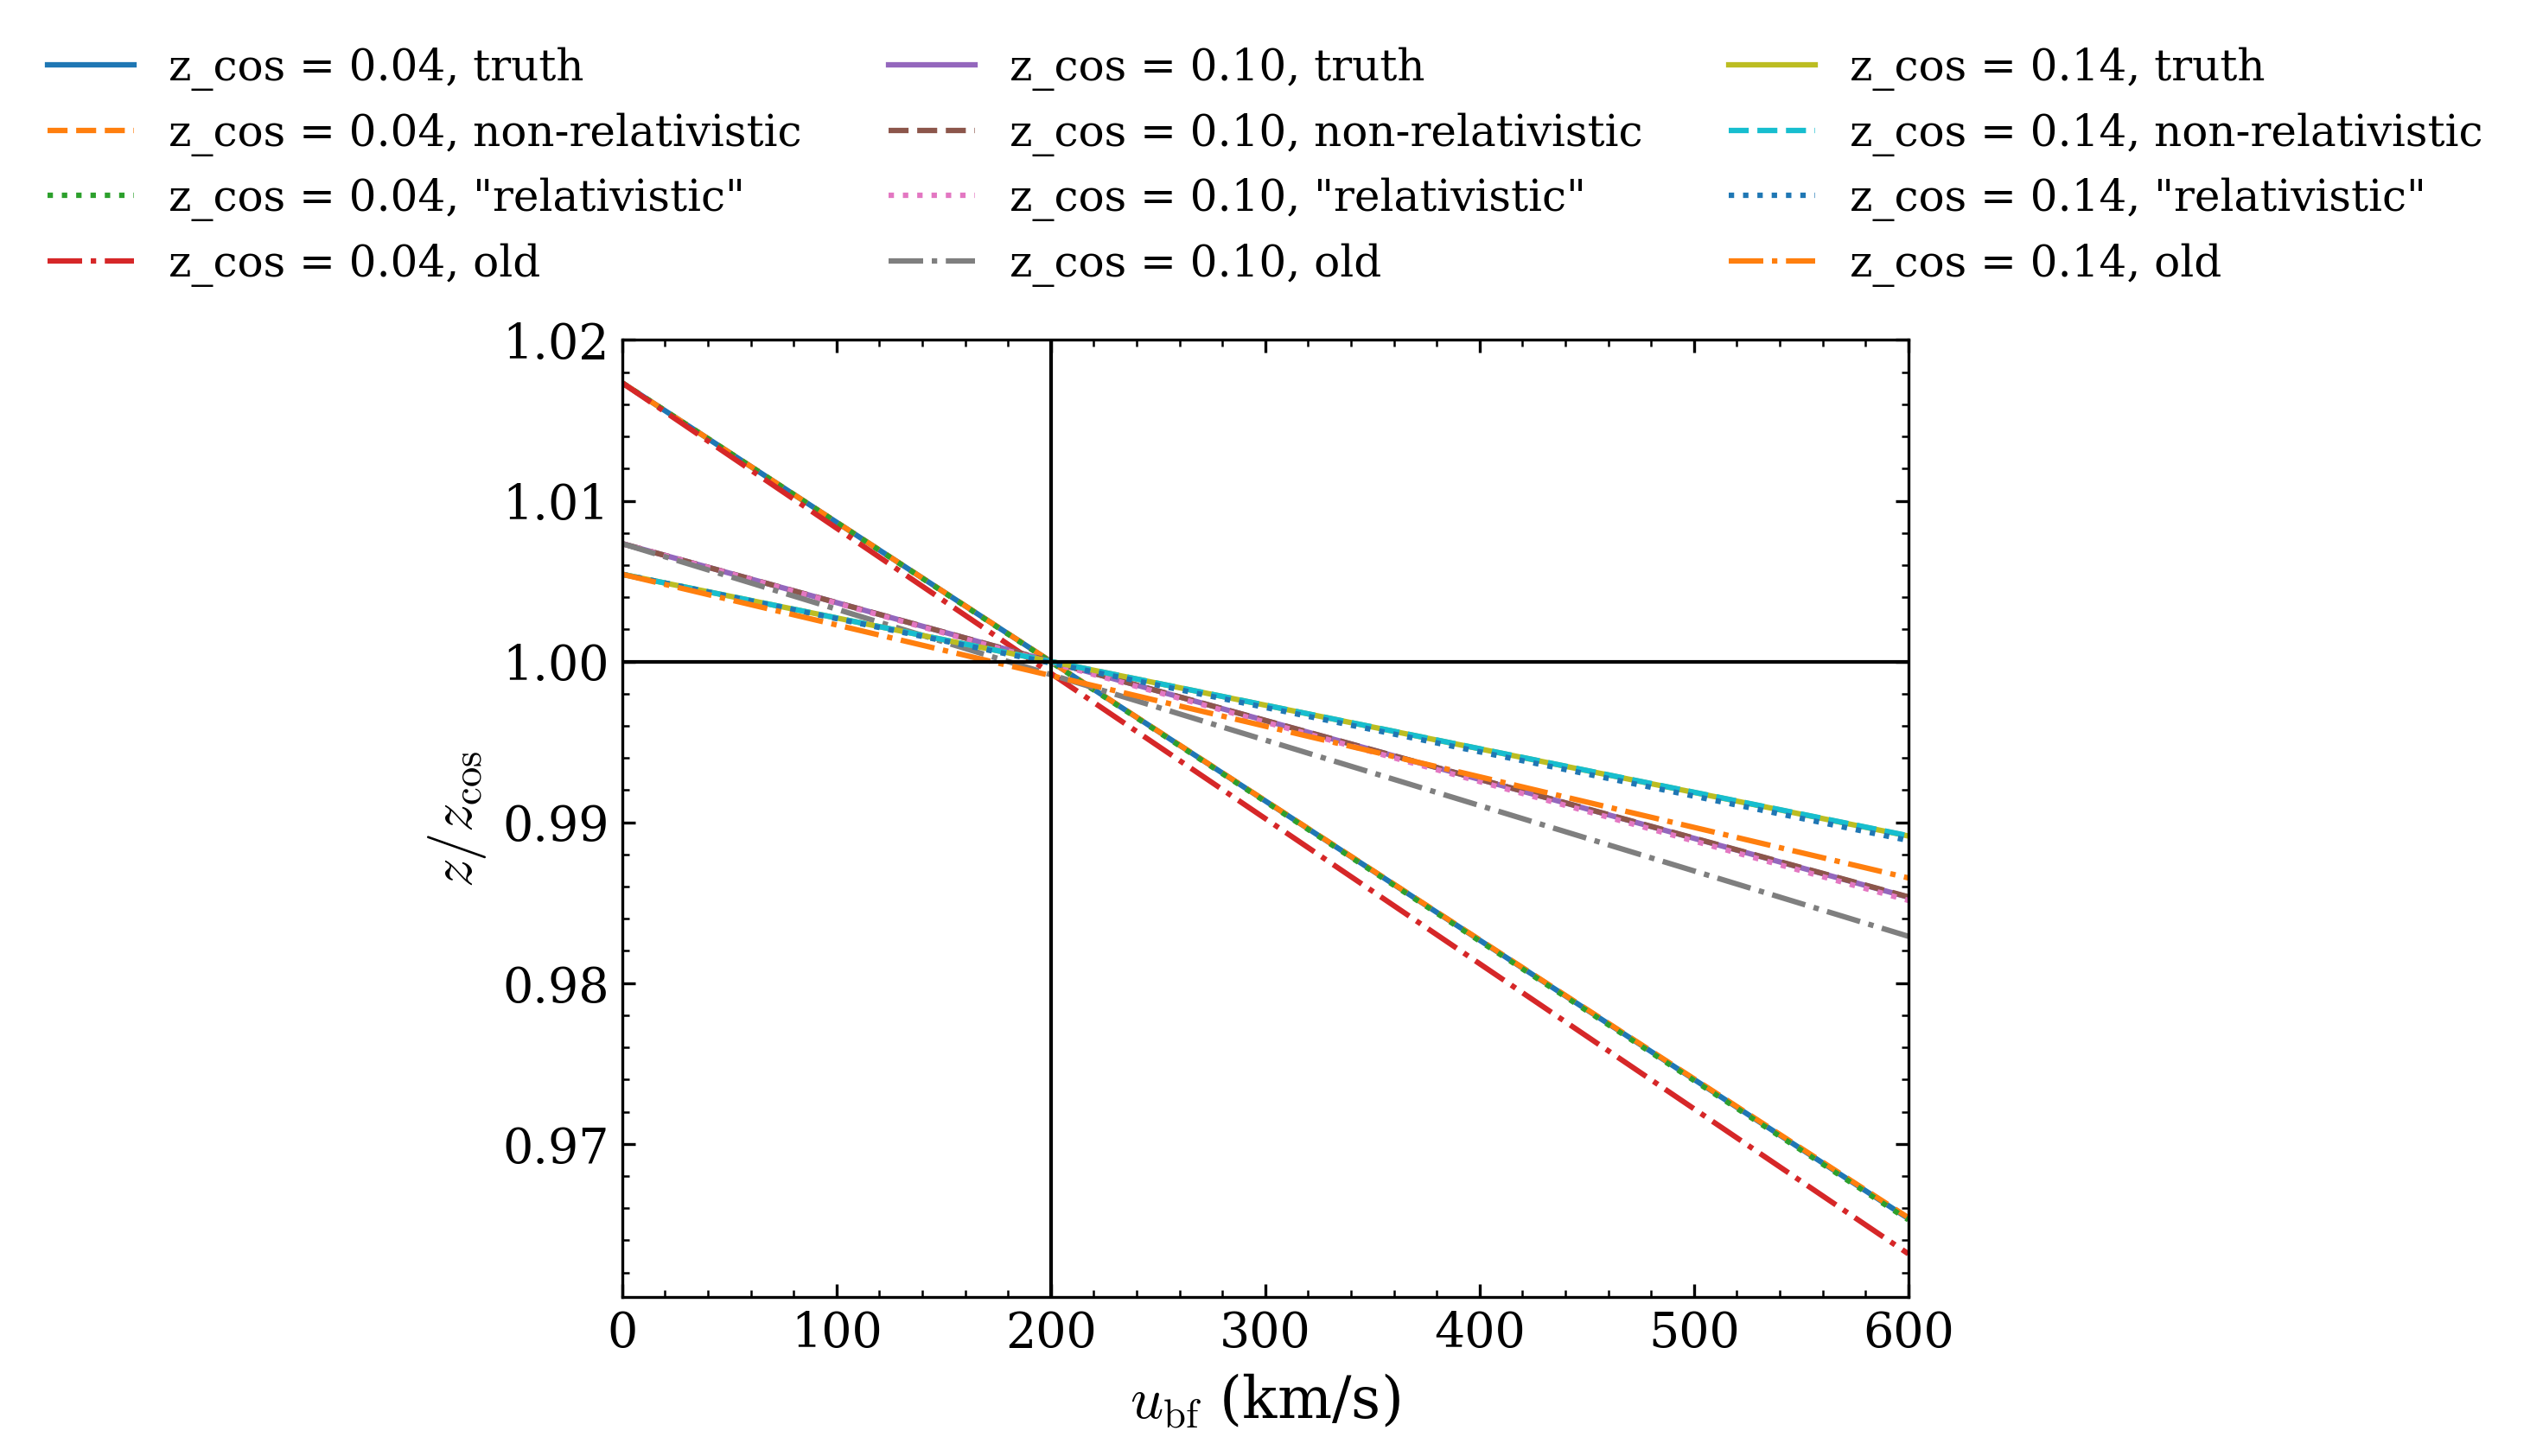

In [58]:
fig, ax = plt.subplots(1, 1, dpi=300)

C = 3e5 # km/s
z_cos = np.array([0.04, 0.1, 0.14])
v_pec = 200 # Suppose it's line of sight
z_obs = (1 + z_cos) * np.sqrt((1 + v_pec/C)/(1 - v_pec/C)) - 1
ubfs = np.linspace(0, 600, 10)
for i in range(len(z_cos)):
    # Truth
    z = (1 + z_cos[i]) * np.sqrt((1 + (v_pec-ubfs)/C)/(1 - (v_pec-ubfs)/C)) - 1
    plt.plot(ubfs, z/z_cos[i], label='z_cos = %.2f, truth' % z_cos[i])

    # Non-relativistic model
    # z = z_obs[i] - (1+z_obs[i])*ubfs/C
    z = (z_obs[i] - ubfs/C) / (1+ubfs/C)
    plt.plot(ubfs, z/z_cos[i], label='z_cos = %.2f, non-relativistic' % z_cos[i], linestyle='--')

    # Relativistic model
    u_c = ((1+z_obs[i])**2-1)/((1+z_obs[i])**2+1) - ubfs/C
    z = np.sqrt((1+u_c)/(1-u_c))-1
    plt.plot(ubfs, z/z_cos[i], label='z_cos = %.2f, "relativistic"' % z_cos[i], linestyle=':')

    # Old model
    u_c = ((1+z_obs[i])**2-1)/((1+z_obs[i])**2+1) - (1+z_obs[i])*ubfs/C
    z = np.sqrt((1+u_c)/(1-u_c))-1
    plt.plot(ubfs, z/z_cos[i], label='z_cos = %.2f, old' % z_cos[i], linestyle='-.')

plt.xlabel('$u_\\mathrm{{bf}}$ (km/s)')
plt.ylabel('$z/z_\\mathrm{{cos}}$')
plt.xlim(0, 600)
plt.axvline(200, color='black', linewidth=1)
plt.axhline(1, color='black', linewidth=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncols=3)
plt.show()


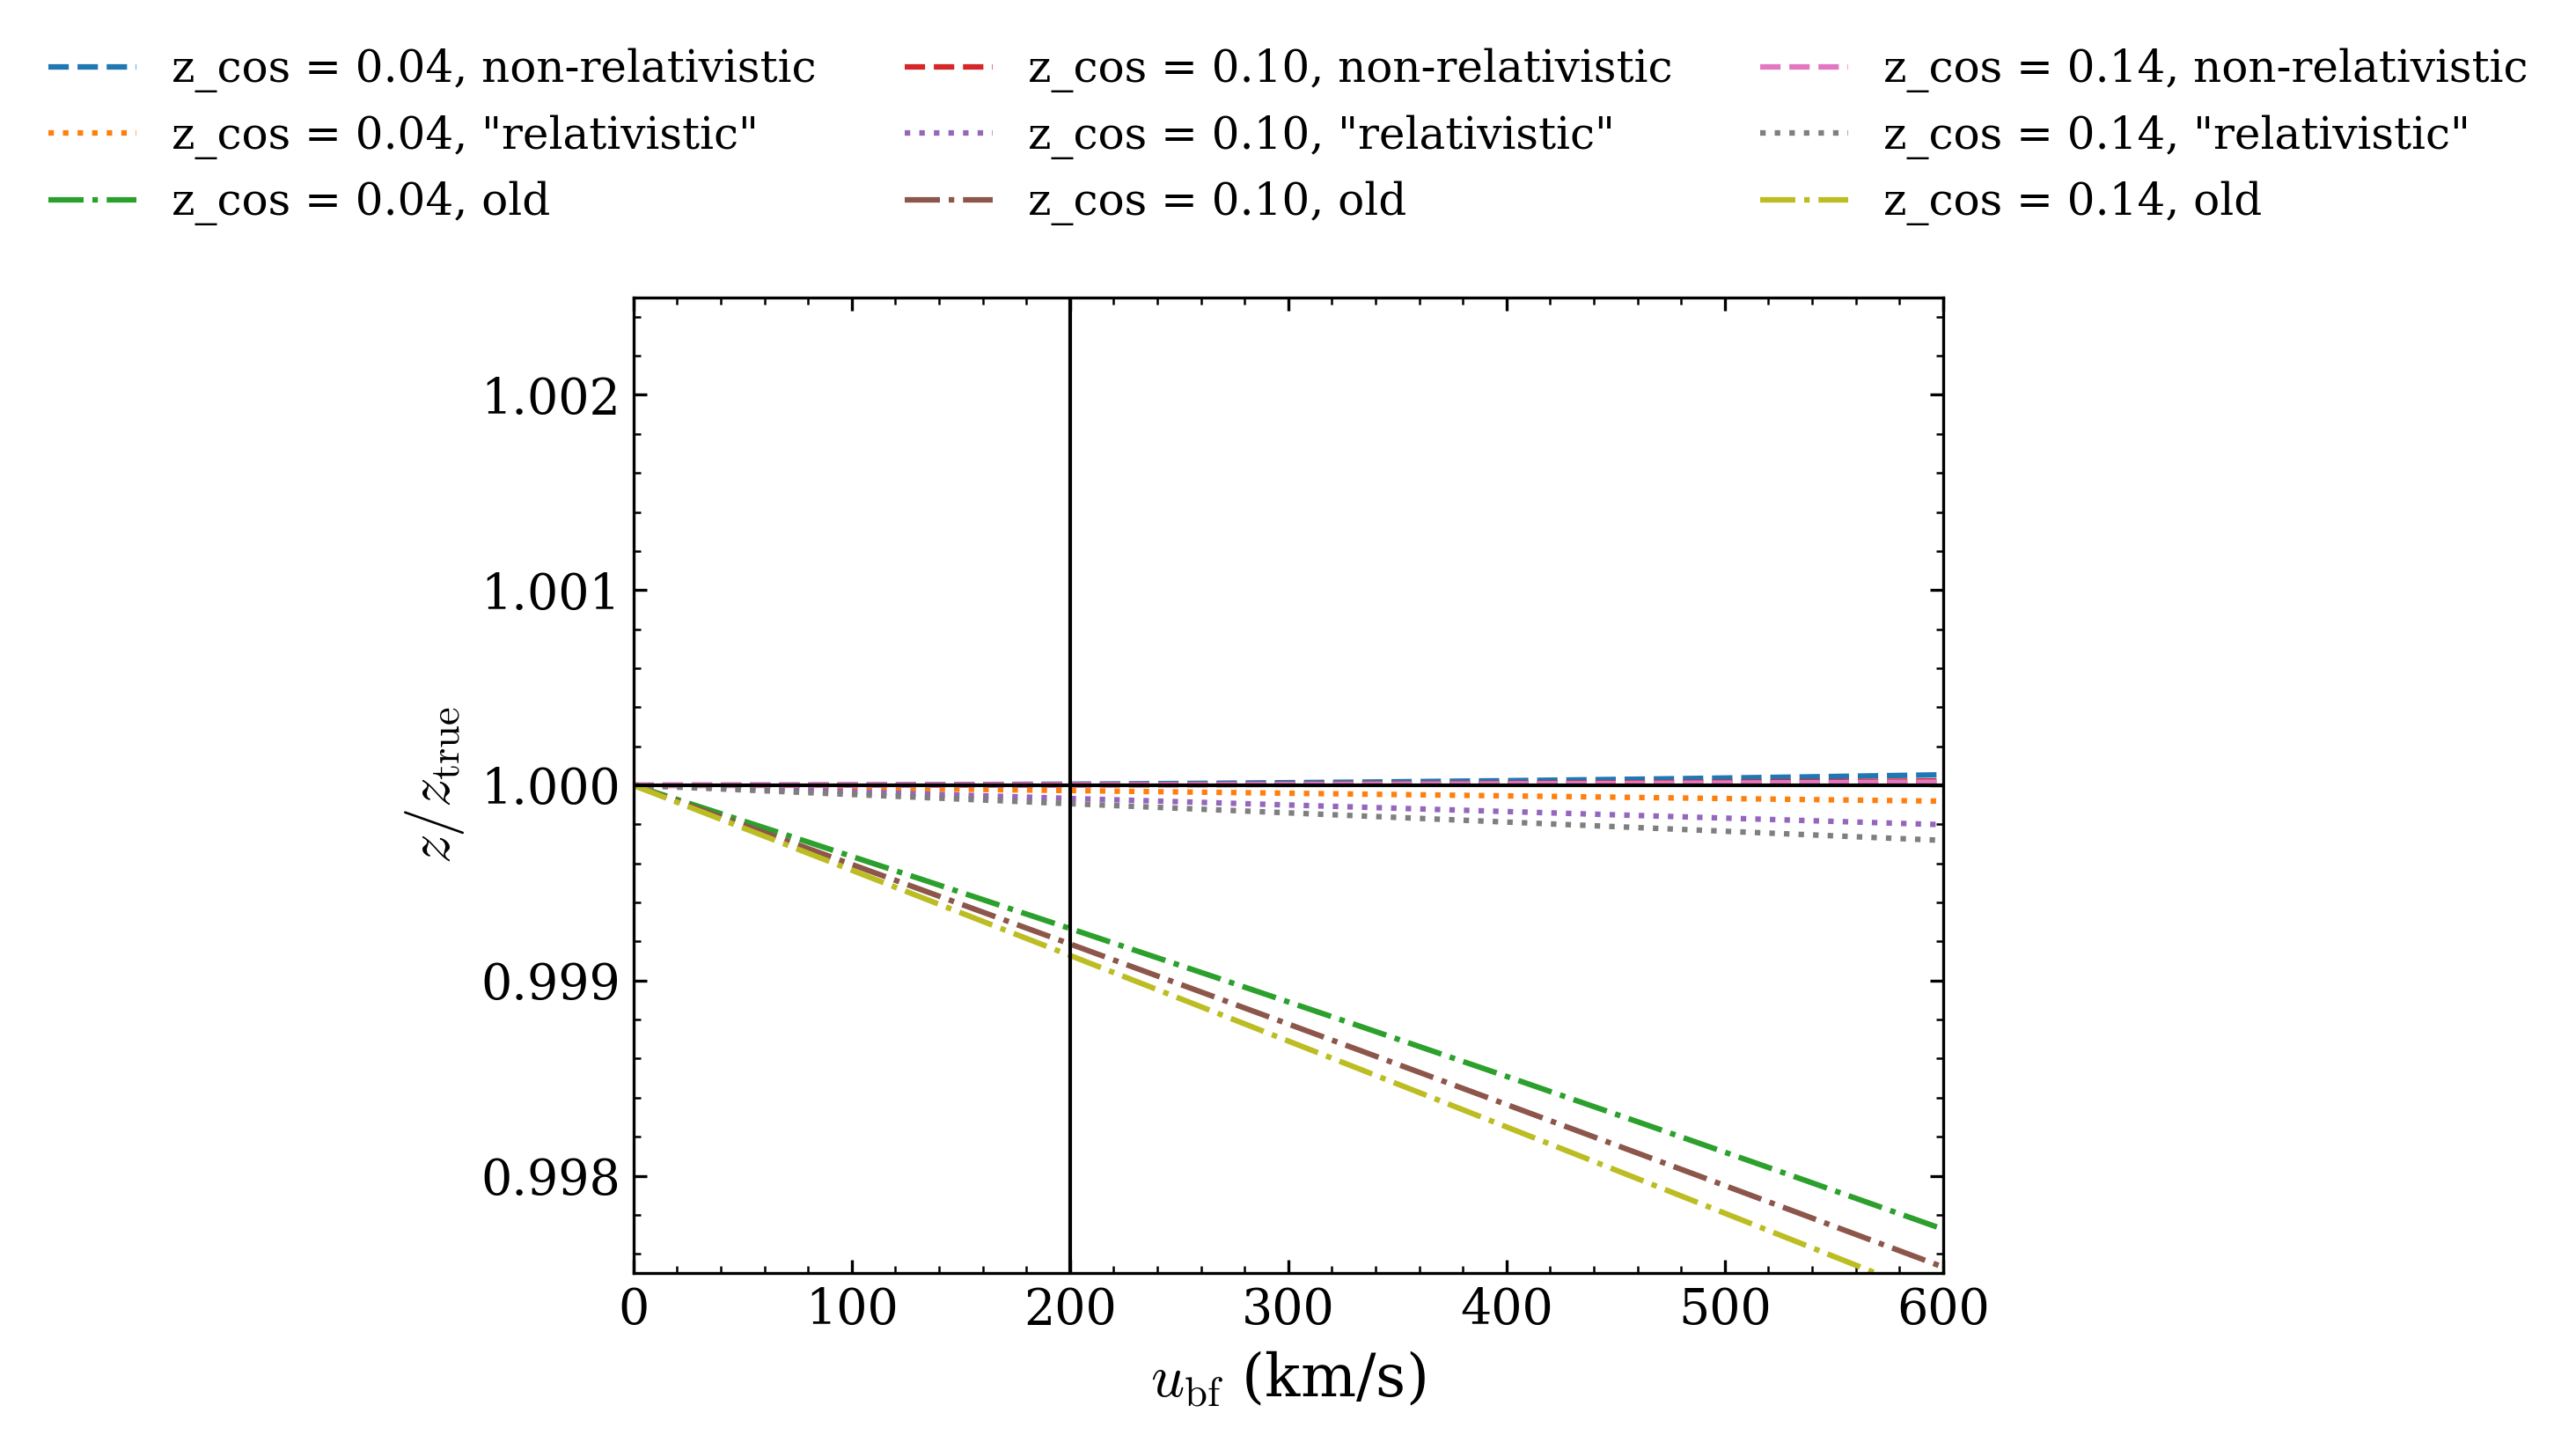

In [57]:
fig, ax = plt.subplots(1, 1, dpi=300)

C = 3e5 # km/s
z_cos = np.array([0.04, 0.1, 0.14])
v_pec = 200 # Suppose it's line of sight
z_obs = (1 + z_cos) * np.sqrt((1 + v_pec/C)/(1 - v_pec/C)) - 1
ubfs = np.linspace(0, 600, 10)
for i in range(len(z_cos)):
    # Truth
    z = (1 + z_cos[i]) * np.sqrt((1 + (v_pec-ubfs)/C)/(1 - (v_pec-ubfs)/C)) - 1
    truth = z
    # plt.plot(ubfs, z/z_cos[i], label='z_cos = %.2f, truth' % z_cos[i])

    # Non-relativistic model
    # z = z_obs[i] - (1+z_obs[i])*ubfs/C
    z = (z_obs[i] - ubfs/C) / (1+ubfs/C)
    plt.plot(ubfs, z/truth, label='z_cos = %.2f, non-relativistic' % z_cos[i], linestyle='--')

    # Relativistic model
    u_c = ((1+z_obs[i])**2-1)/((1+z_obs[i])**2+1) - ubfs/C
    z = np.sqrt((1+u_c)/(1-u_c))-1
    plt.plot(ubfs, z/truth, label='z_cos = %.2f, "relativistic"' % z_cos[i], linestyle=':')

    # Old model
    u_c = ((1+z_obs[i])**2-1)/((1+z_obs[i])**2+1) - (1+z_obs[i])*ubfs/C
    z = np.sqrt((1+u_c)/(1-u_c))-1
    plt.plot(ubfs, z/truth, label='z_cos = %.2f, old' % z_cos[i], linestyle='-.')

plt.xlabel('$u_\\mathrm{{bf}}$ (km/s)')
plt.ylabel('$z/z_\\mathrm{{true}}$')
plt.xlim(0, 600)
plt.ylim(0.9975, 1.0025)
plt.axvline(200, color='black', linewidth=1)
plt.axhline(1, color='black', linewidth=1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncols=3)
plt.show()